In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

In [2]:
# 对每一列进行标准化处理
def cost_normalize(column):
    '''
    效益型指标标准化，越大越好
    '''
    max_value = column.max()
    min_value = column.min()
    return (max_value - column) / (max_value - min_value)

def benefit_normalize(column):
    '''
    成本型指标标准化，越小越好
    '''
    max_value = column.max()
    min_value = column.min()
    return (column - min_value) / (max_value - min_value)

def fix_normalize(column, a=0):
    '''
    固定型指标标准化，越接近固定值 a 最好
    '''
    max_value = np.abs(column - a).max()
    min_value = np.abs(column - a).min()
    return (max_value - np.abs(column - a)) / (max_value - min_value)

In [3]:
# 计算每列的权重
def entropy_weight(column):
    '''
    熵权法计算权重
    '''
    p = column / column.sum()
    e = np.nansum(-p*np.log(p)/np.log(len(column)), axis=0)
    return (1 - e) / np.sum(1 - e)

def coefficient_variation(column):
    '''
    变异系数法计算权重
    '''
    # 计算每列的变异系数
    cv = column.std() / column.mean()
    # 计算每列的权重
    w = cv / np.sum(cv)
    return np.array(w)

In [4]:
# df1 is template, df2 is the data to be sorted
def change_index(df1, df2):
    df1.set_index('城市', inplace=True)
    df2.set_index('城市', inplace=True)
    df2 = df2.loc[df1.index]
    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    return df2
# economy_2018, economy_2019 = change_index(economy_2018, economy_2019)
# economy_2019

In [15]:
import os

def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    # use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def get_output_dir():
    script_dir = os.getcwd()
    output_dir = os.path.join(script_dir, "output")
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)
    return output_dir

def plot_factor(dtframe, filename):
    plt.rc('font',family='SimHei')  #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

    # use_svg_display()
    set_figsize((15, 2.5))
    plt.plot(dtframe.iloc[:, 1], 'o-', linewidth=2, color='r', alpha=0.5, label=f'{filename}')
    # plt.xlabel('xlabel')
    plt.ylabel(filename)
    plt.xticks(np.linspace(0, 25, 26), dtframe.iloc[:, 0])
    plt.legend()
    # plt.savefig(f'{filename}.pdf', bbox_inches='tight')
    plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()
    plt.clf()

def plot_dataframe(dtframe):
    plt.rc('font',family='SimHei')  #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

    # use_svg_display()
    set_figsize((15, 2.5))
    dtframe.plot(subplots=True)
    plt.show()
    plt.clf()    

def plot_df_eachcol(dtframe, fn, yr):
    plt.rc('font',family='SimHei')  #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    output_dir = get_output_dir()

    # use_svg_display()
    for idx, col in enumerate(dtframe.columns):
        if (idx == 0):
            continue
        set_figsize((15, 2.5))
        # print(idx)
        # print(col)
        plt.plot(dtframe.iloc[:, idx], 'o-', linewidth=2, color='r', alpha=0.5, label=f'{fn}_{col}_{yr}')
        # # plt.xlabel('xlabel')
        plt.ylabel(col)
        plt.xticks(np.linspace(0, 25, 26), dtframe.iloc[:, 0])
        plt.legend()
        # # plt.savefig(f'{filename}.pdf', bbox_inches='tight')
        plt.savefig(os.path.join(output_dir, f'{fn}_{col}_{yr}.png'), bbox_inches='tight')
        
        # plt.show()
        plt.clf()    

def plot_rank(rank, filename):
    plt.rc('font',family='SimHei')  #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

    set_figsize((15, 2.5))
    # plt.plot(rank.iloc[:, 1], 'o-', linewidth=2, color='r', alpha=0.5, label=f'{filename}')
    plt.plot(rank.index, rank.values, linewidth=2, color='r', alpha=0.5, label=f'{filename}')
    for a,b in zip(rank.index, rank.values):
        plt.text(a, b, f'{round(b,2)}')
    # for i,j in zip(rank.index, rank.values):
    #     plt.annotate(str(round(j,2)), xy=(i,j))
    # plt.xlabel('xlabel')
    plt.ylabel(f'综合评价分数')
    # plt.xticks(np.linspace(0, 25, 26), rank.iloc[:, 0])
    plt.legend()
    # plt.savefig(f'{filename}.pdf', bbox_inches='tight')
    output_dir = get_output_dir()
    plt.savefig(os.path.join(output_dir, f'{filename}.png'), bbox_inches='tight')
    # plt.show()
    plt.clf()


In [18]:
# main function
datafilelist = ['1.经济发展度', '2.社会和谐度', '3.生活方便度', '4.环境舒适度']
yearlist = ['2018', '2019', '2020', '2021', '2022']
# datafilelist = ['1.经济发展度']
# yearlist = ['2018']
# factors = [['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'],
        #    ['住户存款余额（亿元）', '城镇非私营单位在岗职工平均工资(元)', '年末户籍人口（万人）', '住宅商品房价格与人均工资比', '城镇登记失业率', '社会抚养比'],
        #    ['年末邮政局（个）', '普通本科专科在校学生数（万人）', '人均移动电话资源占有数(个)', '每千人口拥有执业 (助理) 医师数', '医院数（个 ）', '执业(助理)医师数（人）', '年末户籍人口（千人）', '年末移动电话用户数量（万个）'],
        #    ['道路交通等效声级dB(A)', '环境噪声等效声级dB(A)', '第二产业占比', '城市绿化覆盖率', '第一产业增加值(亿元)', '第三产业增加值（亿元）'],
        #   ]
# 0-效益型，1-成本型，2-中间型
bcfi = [[0, 0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 0],
        ]
benidx = [[0,1,2,3,4], [0,1,2,3], [0,1,2,3,4], [3]]
costidx = [[], [], [], [0,1,2]]
fixidx = [[], [], [], []]

# get the first data as template
df_template = pd.ExcelFile(f'./data/{datafilelist[0]}2018-2022.xlsx').parse(yearlist[0]).head(26)

for fn in datafilelist:
    strfilename = f'./data/{fn}2018-2022.xlsx'
    print(strfilename)
    fnid = int(fn[0]) - 1
    # read data from excel file
    pdFile = pd.ExcelFile(strfilename)
    # process data for each year
    for yr in yearlist:
        print(f'{yr}')
        df_yr = pdFile.parse(yr).head(26)
        df_yr = change_index(df_template, df_yr)

        # plot each column
        plot_df_eachcol(df_yr, fn[2:], yr)

        # preprocess data
        numerical_features = df_yr.dtypes[df_yr.dtypes != 'object'].index
        print(numerical_features)
        
        benefit_index = numerical_features[benidx[fnid]]
        cost_index = numerical_features[costidx[fnid]]
        fix_index = numerical_features[fixidx[fnid]]
        df_yr_benefit = df_yr[benefit_index]
        df_yr_cost = df_yr[cost_index]
        df_yr_fix = df_yr[fix_index]
        # normalize each column
        df_yr_cost_new = df_yr_cost.apply(cost_normalize)
        df_yr_benefit_new = df_yr_benefit.apply(benefit_normalize)
        df_yr_fix_new = df_yr_fix.apply(fix_normalize)
        df_yr_benefit_new.set_index(df_yr.iloc[:, 0], inplace=True)
        df_yr_cost_new.set_index(df_yr.iloc[:, 0], inplace=True)
        df_yr_fix_new.set_index(df_yr.iloc[:, 0], inplace=True)
        # concat benefit, cost and fix parts
        df_yr_new = pd.concat((df_yr_benefit_new, df_yr_cost_new, df_yr_fix_new), axis=1)
        # now df_yr_new is the 相对偏差模糊矩阵

        # calculate weights
        # weight_entropy = entropy_weight(df_yr_new.iloc[:, :])
        # print(weight_entropy)
        coevar = coefficient_variation(df_yr_new.iloc[:, :])
        # print(coevar)
        # calculate rank
        rank = df_yr_new.iloc[:, :].dot(coevar)
        # print(rank)
        sorted_rank = rank.sort_values(ascending=False)
        plot_rank(sorted_rank, f'{fn[2:]}_综合评价_{yr}')
    
    pdFile.close()



./data/1.经济发展度2018-2022.xlsx
2018
Index(['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'], dtype='object')
[0.17779326 0.1900665  0.24850813 0.25807169 0.12556042]
2019
Index(['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'], dtype='object')
[0.17623791 0.18708841 0.25771737 0.26394576 0.11501055]
2020
Index(['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'], dtype='object')
[0.18671685 0.18565382 0.24972084 0.26112456 0.11678392]
2021
Index(['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'], dtype='object')
[0.19254713 0.17442026 0.25556878 0.26309272 0.1143711 ]
2022
Index(['社会消费品零售总额（亿元）', '人均GDP(元)', '一般公共预算收入（亿元）', '一般公共预算支出（亿元）', '第三产业占比'], dtype='object')
[0.18966637 0.18272652 0.25174513 0.2591565  0.11670547]
./data/2.社会和谐度2018-2022.xlsx
2018
Index(['住户存款余额（亿元）', '城镇非私营单位在岗职工平均工资(元)', '年末户籍人口（万人）', '住宅商品房价格与人均工资比',
       '城镇登记失业率', '社会抚养比'],
      dtype='object')
[0.25568753 0.21070033 0.300

<Figure size 1500x250 with 0 Axes>

In [92]:
datafilelist = ['1.经济发展度']
print(datafilelist[0][2:])

经济发展度


In [62]:
# economy = pd.ExcelFile('./data/经济发展度数据2018-2022(大于500万).xlsx')
economy = pd.ExcelFile('./data/1.经济发展度2018-2022.xlsx')
economy_2018 = economy.parse('2019').head(26)
# economy = pd.ExcelFile('./data/数学建模数据.xlsx')
# economy_2018 = economy.parse('1经济发展度')
economy_2018

,城市,城市GDP （亿元）,第三产业增加值（亿元）,社会消费品零售总额（亿元）,人均GDP(元),年末户籍人口（万人）,一般公共预算收入（亿元）,一般公共预算支出（亿元）
0,重庆,23605.77,12662.22,11631.7,69097.676134,3416.29,2134.93,4847.68
1,成都,17013.00,11155.86,8313.4,113414.707314,1500.07,1482.96,2006.95
2,上海,37987.55,27686.89,15847.6,258541.822637,1469.30,7165.10,8179.28
3,北京,35445.13,29663.38,15063.7,253650.565336,1397.40,5817.10,7408.19
4,天津,14055.46,8922.87,4218.2,126833.727373,1108.18,2410.41,3555.71
5,石家庄,5810.00,3528.72,2465.2,55207.670160,1052.39,569.13,1051.39
6,西安,9321.00,5874.62,5140.9,97424.587662,956.74,702.56,1247.02
7,广州,23629.00,16923.22,9551.6,247756.154846,953.72,1699.04,2865.33
8,哈尔滨,5249.00,3552.55,4356.1,55174.806063,951.34,370.91,1101.14
9,武汉,16223.00,9855.34,7774.5,178982.789056,906.40,1564.12,2237.10


In [18]:
numerical_features = economy_2018.dtypes[economy_2018.dtypes != 'object'].index
numerical_features

NameError: name 'economy_2018' is not defined

In [64]:
benefit_index = numerical_features[0:0]
cost_index = numerical_features[0:7]
fix_index = numerical_features[5:5]

In [65]:
economy_2018_benefit = economy_2018[benefit_index]
economy_2018_cost = economy_2018[cost_index]
economy_2018_fix = economy_2018[fix_index]
print(economy_2018_cost)

    城市GDP （亿元）  第三产业增加值（亿元）  社会消费品零售总额（亿元）       人均GDP(元)  年末户籍人口（万人）   
0     23605.77     12662.22        11631.7   69097.676134     3416.29  \
1     17013.00     11155.86         8313.4  113414.707314     1500.07   
2     37987.55     27686.89        15847.6  258541.822637     1469.30   
3     35445.13     29663.38        15063.7  253650.565336     1397.40   
4     14055.46      8922.87         4218.2  126833.727373     1108.18   
5      5810.00      3528.72         2465.2   55207.670160     1052.39   
6      9321.00      5874.62         5140.9   97424.587662      956.74   
7     23629.00     16923.22         9551.6  247756.154846      953.72   
8      5249.00      3552.55         4356.1   55174.806063      951.34   
9     16223.00      9855.34         7774.5  178982.789056      906.40   
10    11590.00      6831.77         5324.0  131465.517241      881.60   
11    11741.00      7148.57         5126.6  141275.704814      831.07   
12     9443.00      5835.09         5162.2  118520.

In [67]:
economy_2018_cost_new = economy_2018_cost.apply(cost_normalize)
economy_2018_benefit_new = economy_2018_benefit.apply(benefit_normalize)
economy_2018_fix_new = economy_2018_fix.apply(fix_normalize)

economy_2018_benefit_new.set_index(economy_2018.iloc[:, 0], inplace=True)
economy_2018_cost_new.set_index(economy_2018.iloc[:, 0], inplace=True)
economy_2018_fix_new.set_index(economy_2018.iloc[:, 0], inplace=True)

# 输出标准化后的数据框
# print(economy_2018_benefit_new)
print(economy_2018_cost_new)

     城市GDP （亿元）  第三产业增加值（亿元）  社会消费品零售总额（亿元）  人均GDP(元)  年末户籍人口（万人）   
城市                                                                  
重庆     0.429556     0.631218       0.305875  0.967903    0.000000  \
成都     0.626470     0.687146       0.546626  0.865737    0.665287   
上海     0.000000     0.073383       0.000000  0.531170    0.675970   
北京     0.075937     0.000000       0.056874  0.542446    0.700933   
天津     0.714806     0.770052       0.843743  0.834802    0.801346   
石家庄    0.961082     0.970326       0.970928  0.999924    0.820716   
西安     0.856215     0.883227       0.776799  0.902600    0.853924   
广州     0.428862     0.473016       0.456791  0.556035    0.854973   
哈尔滨    0.977838     0.969441       0.833738  1.000000    0.855799   
武汉     0.650065     0.735431       0.585725  0.714581    0.871402   
郑州     0.788444     0.847690       0.763515  0.824124    0.880012   
青岛     0.783934     0.835928       0.777837  0.801508    0.897555   
济南     0.852571     0.884695      

In [68]:
economy_2018_new = pd.concat((economy_2018_benefit_new, economy_2018_cost_new, economy_2018_fix_new), axis=1)
# economy_2018_new.to_excel('./data/economy_2018_new.xlsx')
economy_2018_new

,城市GDP （亿元）,第三产业增加值（亿元）,社会消费品零售总额（亿元）,人均GDP(元),年末户籍人口（万人）,一般公共预算收入（亿元）,一般公共预算支出（亿元）
城市,,,,,,,
重庆,0.429556,0.631218,0.305875,0.967903,0.000000,0.740363,0.450821
成都,0.626470,0.687146,0.546626,0.865737,0.665287,0.836323,0.835218
上海,0.000000,0.073383,0.000000,0.531170,0.675970,0.000000,0.000000
北京,0.075937,0.000000,0.056874,0.542446,0.700933,0.198405,0.104341
天津,0.714806,0.770052,0.843743,0.834802,0.801346,0.699817,0.625645
石家庄,0.961082,0.970326,0.970928,0.999924,0.820716,0.970825,0.964521
西安,0.856215,0.883227,0.776799,0.902600,0.853924,0.951186,0.938049
广州,0.428862,0.473016,0.456791,0.556035,0.854973,0.804520,0.719065
哈尔滨,0.977838,0.969441,0.833738,1.000000,0.855799,1.000000,0.957789


In [70]:
economy = economy_2018_new
economy_weight_entropy = entropy_weight(economy.iloc[:, :])
economy_weight_entropy


c:\Users\bjiang7\AppData\Local\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([0.18373407, 0.16003099, 0.18761948, 0.10307743, 0.08516331,
       0.12593354, 0.15444117])

In [71]:
economy_weight_coe = coefficient_variation(economy.iloc[:, :])
economy_weight_coe

array([0.16832337, 0.15230314, 0.16956715, 0.12186666, 0.10429978,
       0.13385665, 0.14978324])

In [72]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()

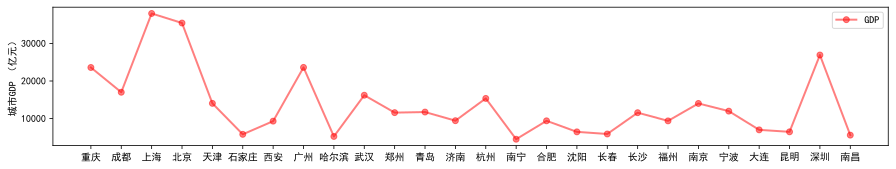

In [73]:
plt.rc('font',family='SimHei')  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

set_figsize((15, 2.5))
plt.plot(economy_2018.iloc[:, 1], 'o-', linewidth=2, color='r', alpha=0.5, label='GDP')
# plt.xlabel('xlabel')
plt.ylabel(f'{economy_2018.columns[1]}')
plt.xticks(np.linspace(0, 25, 26), economy_2018.iloc[:, 0])
plt.legend()
plt.savefig('GDP.pdf', bbox_inches='tight')
# plt.savefig('name.svg', bbox_inches='tight')
plt.show()